# 1. 모델 성능 평가

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.models import load_model
import model_evaluation_utils as meu

In [2]:
img_aug_cnn = load_model('cats_dogs_cnn_img_aug.h5')
tl_img_aug_finetune_cnn = load_model('10-06-me.h5')

In [3]:
## 이미지 기본 모양
IMG_DIM = (150, 150)
input_shape = (150, 150, 3)
num2class_label_transformer = lambda l: ['cat' if x == 0 else 'dog' for x in l]
class2num_label_transformer = lambda l: [0 if x == 'cat' else 1 for x in l]

### 샘플 테스트 이미지로 모델 예측

In [9]:
#sample_img_path = 'my_cat.jpg'
#sample_img_path = "C:\\Users\\user\\Documents\\한국선급\\CNG_P1\\2_104449_11_11.png"
#sample_img_path = 'dog_my.jpg'
sample_img_path = 'tiger.jpg'
sample_img = load_img(sample_img_path, target_size=IMG_DIM)
sample_img_tensor = img_to_array(sample_img)
sample_img_tensor = np.expand_dims(sample_img_tensor, axis=0)
sample_img_tensor /= 255.

print(sample_img_tensor.shape)

(1, 150, 150, 3)


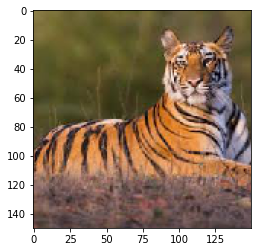

In [10]:
plt.imshow(sample_img_tensor[0])

In [11]:
cnn_img_aug_prediction = num2class_label_transformer(img_aug_cnn.predict_classes(sample_img_tensor, verbose=0))
tlearn_cnn_finetune_img_aug_prediction = num2class_label_transformer(tl_img_aug_finetune_cnn.predict_classes(sample_img_tensor, verbose=0))
print('Predictions for our sample image:\n', 
      '\nCNN with Img Augmentation:', cnn_img_aug_prediction, 
      '\nPre-trained CNN with Fine-tuning & Img Augmentation (Transfer Learning):', tlearn_cnn_finetune_img_aug_prediction)

Predictions for our sample image:
 
CNN with Img Augmentation: ['dog'] 
Pre-trained CNN with Fine-tuning & Img Augmentation (Transfer Learning): ['dog']


In [12]:
img_aug_cnn.predict_proba(sample_img_tensor, verbose=0)

array([[0.8296873]], dtype=float32)

In [13]:
tl_img_aug_finetune_cnn.predict_proba(sample_img_tensor, verbose=0)

array([[0.99996495]], dtype=float32)